In [11]:
# !pip install nltk

In [12]:
import pandas as pd

In [13]:
data = pd.read_csv("SPAMTextClassification.csv")
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
print(data.shape)

(5572, 2)


In [15]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None


In [38]:
X = data.drop(columns=['Category'])  
y = data['Category']

In [77]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

le = LabelEncoder()

y_encoded = le.fit_transform(y)
y_encoded_np = np.array(y_encoded)

# TF-IDF

### Preprocessing

In [100]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = text.lower()
    tokens = word_tokenize(text)
    filtered_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(filtered_tokens)

preprocessed_texts = data['Message'].apply(preprocess_text)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\alisa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\alisa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\alisa\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [101]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import normalize

tfidf_vectorizer = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)
X_tfidf = tfidf_vectorizer.fit_transform(preprocessed_texts)

In [102]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y_encoded_np, test_size=0.3, random_state=42)

In [103]:
print(type(X_train))
print(type(y_train))

<class 'scipy.sparse._csr.csr_matrix'>
<class 'numpy.ndarray'>


### Logistic Regression

In [104]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [105]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

def score(model):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    plt.plot(*roc_curve(y_test, y_pred)[:2], label='test roc_auc')
    plt.plot([0,1], [0,1], '--', color='black')
    plt.grid()
    plt.legend()

Accuracy: 0.9533492822966507

Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1448
           1       0.99      0.66      0.79       224

    accuracy                           0.95      1672
   macro avg       0.97      0.83      0.88      1672
weighted avg       0.96      0.95      0.95      1672


Confusion Matrix:
[[1447    1]
 [  77  147]]
None


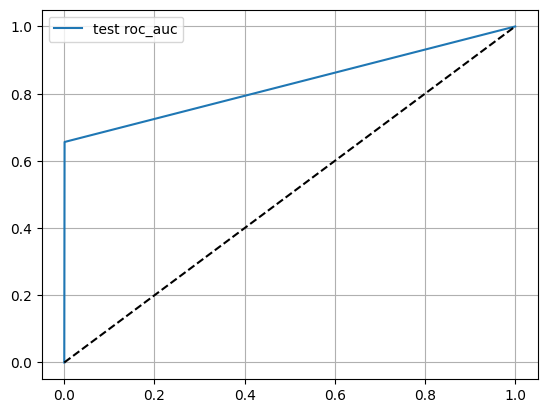

In [107]:
print(score(logreg))

### Naive Bayes

Accuracy: 0.9683014354066986

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1448
           1       0.99      0.77      0.87       224

    accuracy                           0.97      1672
   macro avg       0.98      0.88      0.92      1672
weighted avg       0.97      0.97      0.97      1672


Confusion Matrix:
[[1447    1]
 [  52  172]]
None


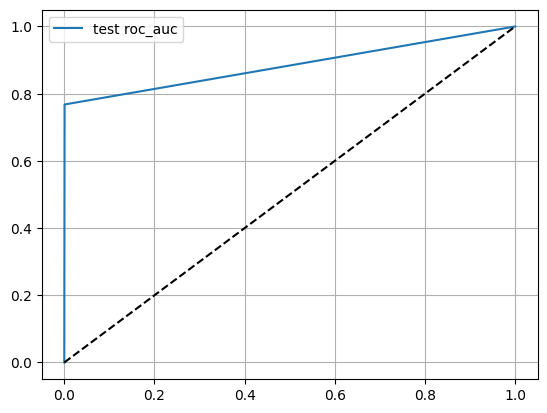

In [108]:
from sklearn.naive_bayes import MultinomialNB

bayes = MultinomialNB()
bayes.fit(X_train, y_train)

print(score(bayes))

### SVM

Accuracy: 0.9784688995215312

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1448
           1       1.00      0.84      0.91       224

    accuracy                           0.98      1672
   macro avg       0.99      0.92      0.95      1672
weighted avg       0.98      0.98      0.98      1672


Confusion Matrix:
[[1448    0]
 [  36  188]]
None


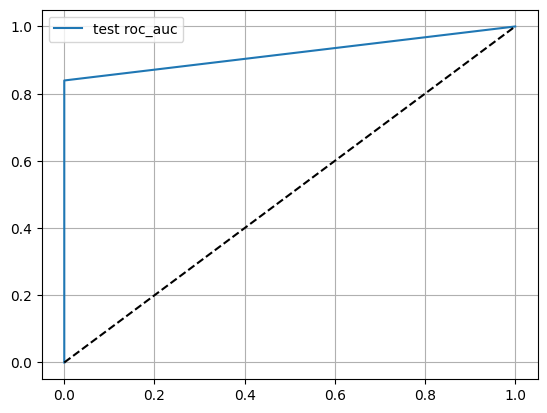

In [110]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train, y_train)

print(score(svm))

# Bag of Words

### Preprocessing

In [112]:
vectorizer = CountVectorizer()
X_bow = vectorizer.fit_transform(preprocessed_texts)

In [113]:
def score_bow(model):
    y_pred = model.predict(X_test_bow)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    plt.plot(*roc_curve(y_test, y_pred)[:2], label='test roc_auc')
    plt.plot([0,1], [0,1], '--', color='black')
    plt.grid()
    plt.legend()

In [114]:
X_train_bow, X_test_bow, y_train, y_test = train_test_split(X_bow, y_encoded_np, test_size=0.3, random_state=42)

### Logistc Regression

Accuracy: 0.9796650717703349

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1448
           1       0.98      0.86      0.92       224

    accuracy                           0.98      1672
   macro avg       0.98      0.93      0.95      1672
weighted avg       0.98      0.98      0.98      1672


Confusion Matrix:
[[1445    3]
 [  31  193]]
None


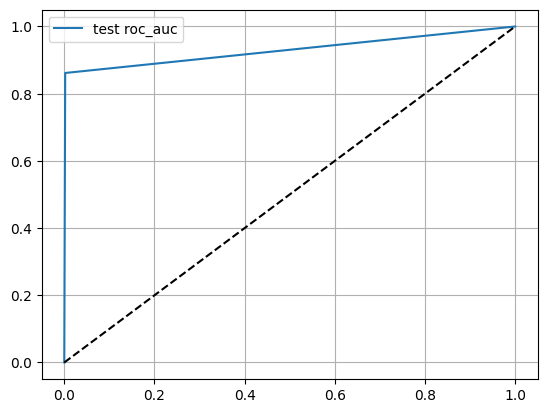

In [115]:
logreg_bow = LogisticRegression()
logreg_bow.fit(X_train_bow, y_train)

print(score_bow(logreg_bow))

### Naive Bayes

Accuracy: 0.9778708133971292

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1448
           1       0.89      0.95      0.92       224

    accuracy                           0.98      1672
   macro avg       0.94      0.97      0.95      1672
weighted avg       0.98      0.98      0.98      1672


Confusion Matrix:
[[1422   26]
 [  11  213]]
None


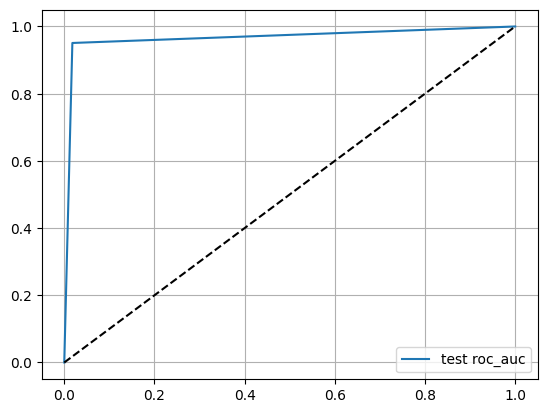

In [116]:
bayes = MultinomialNB()
bayes.fit(X_train_bow, y_train)

print(score_bow(bayes))

### SVM

Accuracy: 0.9778708133971292

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1448
           1       0.98      0.85      0.91       224

    accuracy                           0.98      1672
   macro avg       0.98      0.92      0.95      1672
weighted avg       0.98      0.98      0.98      1672


Confusion Matrix:
[[1445    3]
 [  34  190]]
None


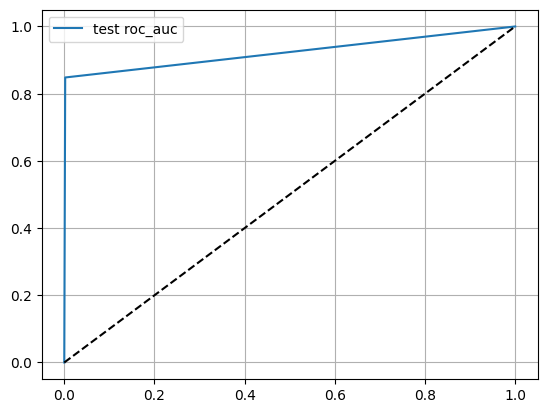

In [117]:
svm = SVC()
svm.fit(X_train_bow, y_train)

print(score_bow(svm))